In [1]:
import subprocess
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
path_to_age_rules = "Files/InitialAge.csv"
path_to_death_rules = "Files/DeathRules.csv"
path_to_config = "Files/config.json"
path = "Demographic.Exec/bin/Debug/net8.0/Demographic.Exec.exe"

subprocess.run([path,
                path_to_age_rules,
                path_to_death_rules,
                path_to_config],
                capture_output=True, text=True)


CompletedProcess(args=['Demographic.Exec/bin/Debug/net8.0/Demographic.Exec.exe', 'Files/InitialAge.csv', 'Files/DeathRules.csv', 'Files/config.json'], returncode=0, stdout='Finished\n', stderr='')

In [9]:
year_by_year = pd.read_csv('Files/Year_by_year_results.csv') 
age_distribution = pd.read_csv('Files/Model_results.csv')

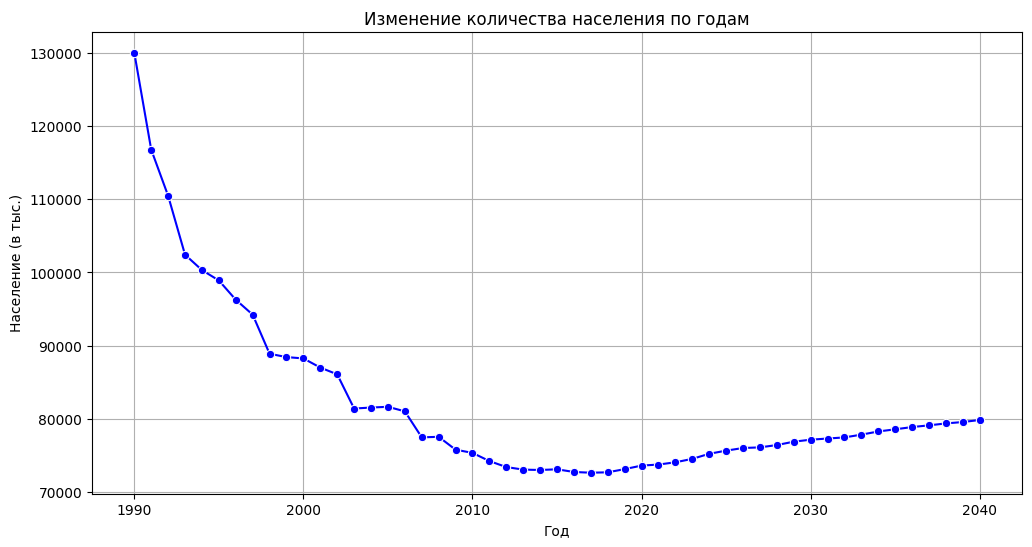

In [10]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=year_by_year, x='year', y='total', marker='o', color='blue')
plt.title('Изменение количества населения по годам')
plt.xlabel('Год')
plt.ylabel('Население (в тыс.)')
plt.grid(True)
plt.show()

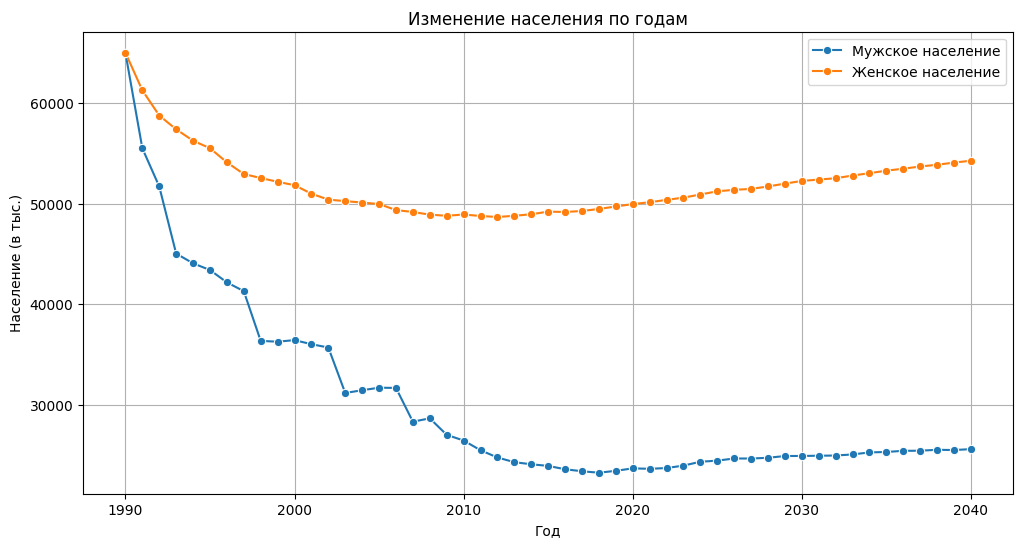

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=year_by_year, x='year', y='men_count', marker='o', label='Мужское население')
sns.lineplot(data=year_by_year, x='year', y='women_count', marker='o', label='Женское население')
plt.title('Изменение населения по годам')
plt.xlabel('Год')
plt.ylabel('Население (в тыс.)')
plt.legend()
plt.grid(True)
plt.show()

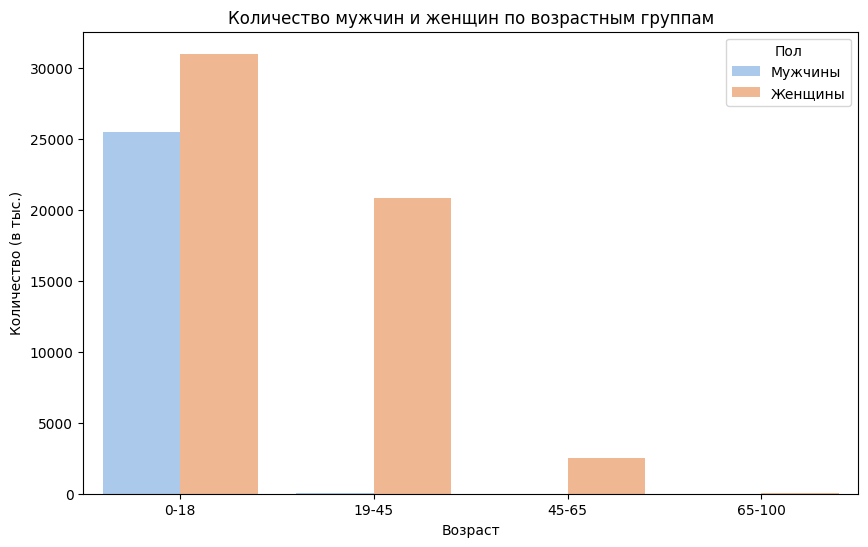

In [12]:
df_melted = age_distribution.melt(id_vars='age', value_vars=['men_count', 'women_count'], 
                    var_name='gender', value_name='count')

plt.figure(figsize=(10, 6))
ax = sns.barplot(x='age', y='count', hue='gender', data=df_melted, palette='pastel')

# Настройки диаграммы
plt.title('Количество мужчин и женщин по возрастным группам')
plt.xlabel('Возраст')
plt.ylabel('Количество (в тыс.)')

# Получаем ручки и метки легенды
hands, labs = ax.get_legend_handles_labels()

# Устанавливаем легенду с правильными цветами
plt.legend(handles=hands, labels=["Мужчины", "Женщины"], title = "Пол")

plt.show()